# Implementation of Support Vector Machines (SVM) for classifying images of handwritten digits into their respective numerical classes (0 to 9). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
digits = datasets.load_digits()
X = digits.data       # feature matrix (each image flattened into 64 features)
y = digits.target     # labels (0–9)

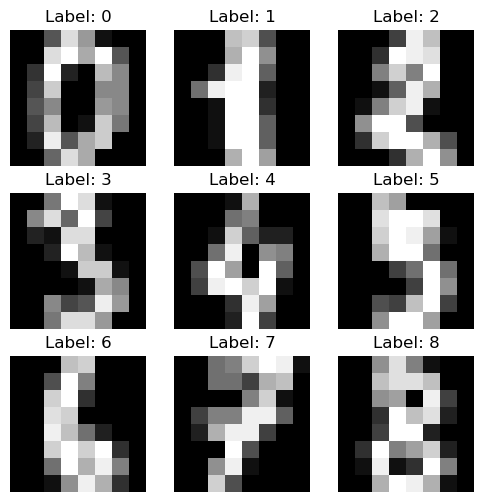

In [3]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [7]:
y_pred = svm_model.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9814814814814815

Confusion Matrix:
 [[54  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  1  0  0  0  0  0]
 [ 0  0 52  0  1  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  1  0  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  3  0  0  1  0  0  0 48  0]
 [ 0  0  0  0  0  0  1  1  0 52]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      0.98      0.96        55
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        55
           4       0.95      0.98      0.96        54
           5       1.00      0.98      0.99        55
           6       0.98      1.00      0.99        54
           7       0.96      1.00      0.98        54
           8       1.00      0.92      0.96        52
           9       0.98      0.96      0.97        54


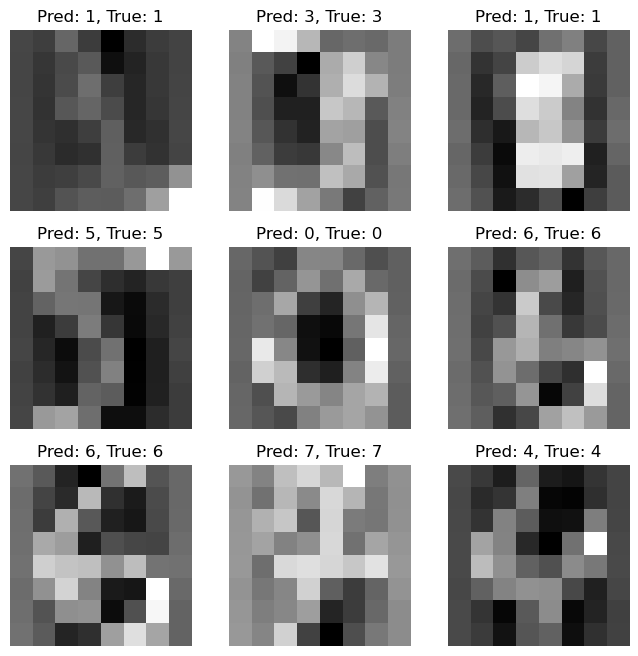

In [9]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()
